In [1]:
import numpy as np
import pandas as pd
from textwrap import wrap
from matplotlib import pyplot as plt
from sklearn import metrics
import matplotlib.ticker as mticker
import sys, os
from hsbmpy import plot_topic_size, get_max_available_L
from hypergeom import parameters_for_hypergeometric, build_map, plot_map

In [2]:
directory="/home/jovyan/work/phd/datasets/gtex/10"
os.chdir(directory)
sys.path.append('/home/jovyan/work/phd/')

In [3]:
L = get_max_available_L(directory)

In [ ]:
df = pd.read_csv("mainTable.csv", index_col=[0])

# topic size

In [ ]:
for l in range(0,L+1):
    plot_topic_size(directory,l)

## Topic O

In [ ]:
df = pd.read_csv("mainTable.csv", index_col=0,header=0)

In [ ]:
df_mv=pd.DataFrame(data=[df.mean(1), df.var(1),df.apply(lambda x: len([x[x>0]])/float(len(x)), 1)], index=['average', 'var', 'O']).transpose()
df_mv.head()

In [ ]:
for l in range(0,L+1):
    fig = plt.figure(figsize=(15,8))
    ax = fig.subplots(1,2)
    candles = get_candles(directory,l,df_mv,ax[0])
    candlestick2_ohlc(ax[0], candles['open'],candles['high'],candles['low'],candles['close'],width=0.6,colordown='b')
    ax[1].hist((np.array(candles['open'])+np.array(candles['close']))/2, weights=candles['size'], range=(-0.05,1.05), bins=10, histtype='step')
    ax[1].set_xlabel("$O_i", fontsize=18)
    plt.show()
    fig.savefig("%s/topic_Ocandles_level_%d.pdf"%(directory,l))

# Geneontology

In [4]:
from geneontology import get_ontology_df, ensg_to_symbol
from tableanalyser import get_symbol
import gseapy as gs

In [ ]:
import importlib, geneontology,tableanalyser
importlib.reload(geneontology)
importlib.reload(tableanalyser)
from geneontology import get_ontology_df, ensg_to_symbol
from tableanalyser import get_symbol

In [22]:
l=L-1
algorithm = "topsbm"
df_topics = pd.read_csv(f"{directory}/{algorithm}/{algorithm}_level_{l}_topics.csv")
df_topics_smooth = pd.read_csv(f"{directory}/{algorithm}/{algorithm}_level_{l}_word-dist.csv",index_col=0)
df_topics_smooth.index = [g[:15] for g in df_topics_smooth.index]
print(f"level {l} with {df_topics.shape[1]} topics")

level 3 with 145 topics


In [6]:
def get_topic_over_thr(topic_name, q=0.05):
    topic = df_topics_smooth[topic_name]
    topic = topic[topic>0]
    topic = topic[topic>topic.quantile(q=q)]
    return topic.sort_values(ascending=False)

In [7]:
df_symbols= pd.read_csv("https://www.genenames.org/cgi-bin/download/custom?col=gd_hgnc_id&col=gd_app_sym&col=gd_pub_ensembl_id&col=md_ensembl_id&col=md_eg_id&status=Approved&status=Entry%20Withdrawn&hgnc_dbtag=on&order_by=gd_app_sym_sort&format=text&submit=submit", index_col=[0], sep='\t')

In [8]:
def get_sea():
    for g in df_topics.values.ravel()[[str(s)!='nan' for s in df_topics.values.ravel()]]:
        yield get_symbol(g)

In [9]:
with open("gback.txt",'w') as f:
    list(map(lambda x: f.writelines(x+'\n') if len(x)>1 else None, get_sea()))
    
with open("gback_ensg.txt",'w') as f:
    list(map(lambda x: f.writelines(x[:15]+'\n')if len(x)>1 else None, df_topics.values.ravel()[[str(s)!='nan' for s in df_topics.values.ravel()]]))

In [19]:
gs.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'Cancer_Cell_Line_Encyclopedia',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'DisGeNET',
 'Disease_Perturbations_from_GEO_down',
 'Disease_Perturbations_from_GEO_up',
 'Disease_Signatures_from_GEO_down_2014',
 'Disease_Signatures_from_GEO_up_2014',
 'DrugMatrix',
 'Drug_Perturbations_from_GEO_2014',
 'Drug_Perturbations

In [10]:
#https://www.gsea-msigdb.org/gsea/downloads.jsp
gene_sets = ['GO_Molecular_Function_2018',
             'GO_Biological_Process_2018',
             'GO_Cellular_Component_2018',
             'Human_Phenotype_Ontology',
             'WikiPathways_2019_Human',
             '/home/jovyan/work/phd/MSigDB/c1.all.v7.1.symbols.gmt',
             '/home/jovyan/work/phd/MSigDB/c2.all.v7.1.symbols.gmt',
             '/home/jovyan/work/phd/MSigDB/c3.all.v7.1.symbols.gmt',
             '/home/jovyan/work/phd/MSigDB/c4.all.v7.1.symbols.gmt',
             '/home/jovyan/work/phd/MSigDB/c5.all.v7.1.symbols.gmt',
             '/home/jovyan/work/phd/MSigDB/c6.all.v7.1.symbols.gmt',
             '/home/jovyan/work/phd/MSigDB/c7.all.v7.1.symbols.gmt',
            ]

In [11]:
threshhold = 5e-1
cutoff = 5e-1
background = len([g for g in get_sea()])
os.system("mkdir -p gsea")
os.system("mkdir -p gsea/{}".format(algorithm))
for itopic,topic in enumerate(df_topics.columns):
    try:
        enriched_topic = pd.read_csv("gsea/%s/gsea_level_%d_topic_%d.csv"%(algorithm,l,itopic+1), index_col=[0])
        print(topic)
    except:
        try:
            gene_list = ensg_to_symbol(df_topics.loc[:,topic].dropna().values)
            #gene_list = ensg_to_symbol(get_topic_over_thr(topic).index)
            print(topic)
            enriched_topic = get_ontology_df(gene_list, cutoff=cutoff, threshhold = threshhold, gene_sets = gene_sets, background=background)
            enriched_topic = enriched_topic.sort_values(by=['Adjusted P-value'], ascending=True)[:20]
            enriched_topic.to_csv("gsea/%s/gsea_level_%d_topic_%d.csv"%(algorithm,l,itopic+1))
        except:
            print(*sys.exc_info())
            continue
    print(enriched_topic)

Topic 1
                                                  Term  Adjusted P-value  \
0                     tau protein binding (GO:0048156)          0.033711   
1             adrenergic receptor binding (GO:0031690)          0.062929   
61          cholesterol catabolic process (GO:0006707)          0.064013   
62              alcohol catabolic process (GO:0046164)          0.073256   
60               sterol catabolic process (GO:0016127)          0.096020   
59   positive regulation of lipid transport (GO:003...          0.112165   
438       perinuclear region of cytoplasm (GO:0048471)          0.259826   
63       transition metal ion homeostasis (GO:0055076)          0.291683   
65   negative regulation of cellular metabolic proc...          0.420814   
440      clathrin-coated vesicle membrane (GO:0030665)          0.481127   
64           regulation of axon extension (GO:0030516)          0.490949   

                       Gene_set  
0    GO_Molecular_Function_2018  
1    GO_Mol

2020-08-25 11:31:41,142 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-08-25 11:31:48,476 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-08-25 11:31:52,399 Warning: No enrich terms using library CUSTOM139629576621952 when cutoff = 0.5
2020-08-25 11:31:53,022 Warning: No enrich terms using library CUSTOM139629576621824 when cutoff = 0.5
2020-08-25 11:31:53,412 Warning: No enrich terms using library CUSTOM139629576638528 when cutoff = 0.5
2020-08-25 11:31:53,529 Warning: No enrich terms using library CUSTOM139629576621888 when cutoff = 0.5
2020-08-25 11:31:53,976 Warning: No enrich terms using library CUSTOM139629466353984 when cutoff = 0.5
2020-08-25 11:31:54,063 Warning: No enrich terms using library CUSTOM139629576638720 when cutoff = 0.5
2020-08-25 11:31:54,558 Warning: No enrich terms using library CUSTOM139629466354048 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
382      Thyroxine (Thyroid Hormone) Production WP1981          0.007415   
323                                Goiter (HP:0000853)          0.009922   
324  Aplasia/Hypoplasia of the abdominal wall muscu...          0.014984   
322                Coarse facial features (HP:0000280)          0.016152   
325                        Hypothyroidism (HP:0000821)          0.115142   
327                      Umbilical hernia (HP:0001537)          0.150558   
383                            Zinc homeostasis WP3529          0.152793   
326                      Hyperpituitarism (HP:0010514)          0.170562   
328                          Constipation (HP:0002019)          0.182214   
384                          Copper homeostasis WP3286          0.212237   
70                   response to zinc ion (GO:0010043)          0.237063   
60              thyroid gland development (GO:0030878)          0.239898   
69          

2020-08-25 11:32:08,142 Warning: No enrich terms using library CUSTOM139629282035328 when cutoff = 0.5
2020-08-25 11:32:09,068 Warning: No enrich terms using library CUSTOM139629282035456 when cutoff = 0.5
2020-08-25 11:32:10,624 Warning: No enrich terms using library CUSTOM139629282035648 when cutoff = 0.5
2020-08-25 11:32:11,727 Warning: No enrich terms using library CUSTOM139629282035712 when cutoff = 0.5


                                                Term  Adjusted P-value  \
31                   muscle contraction (GO:0006936)      4.038630e-20   
33              muscle filament sliding (GO:0030049)      9.920998e-20   
32        actin-myosin filament sliding (GO:0033275)      1.488150e-19   
252        Striated Muscle Contraction Pathway WP383      1.579258e-17   
34          skeletal muscle contraction (GO:0003009)      1.435029e-11   
987                                         GNF2_TTN      5.878736e-11   
35          striated muscle contraction (GO:0006941)      1.973461e-10   
36                    heart contraction (GO:0060047)      3.578052e-09   
37                   myofibril assembly (GO:0030239)      4.656129e-09   
38     regulation of muscle contraction (GO:0006937)      3.158050e-08   
39               sarcomere organization (GO:0045214)      7.226931e-08   
40           cardiac muscle contraction (GO:0060048)      1.438351e-07   
517                   RICKMAN_HEAD_AND

2020-08-25 11:32:25,347 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-08-25 11:32:25,402 Warning: No enrich terms using library CUSTOM139629576402240 when cutoff = 0.5
2020-08-25 11:32:25,947 Warning: No enrich terms using library CUSTOM139629576402368 when cutoff = 0.5
2020-08-25 11:32:26,573 Warning: No enrich terms using library CUSTOM139629576402432 when cutoff = 0.5
2020-08-25 11:32:26,639 Warning: No enrich terms using library CUSTOM139629521066368 when cutoff = 0.5
2020-08-25 11:32:27,195 Warning: No enrich terms using library CUSTOM139629461299328 when cutoff = 0.5


                                                 Term  Adjusted P-value  \
781                                     GNF2_SERPINI2      9.436899e-10   
782                                       GNF2_SPINK1      1.337277e-09   
2       metallocarboxypeptidase activity (GO:0004181)      1.232852e-03   
1         serine-type peptidase activity (GO:0008236)      1.561044e-03   
0     serine-type endopeptidase activity (GO:0004252)      1.770688e-03   
27                           proteolysis (GO:0006508)      2.076375e-03   
29        tetrapyrrole metabolic process (GO:0033013)      2.229548e-03   
3              carboxypeptidase activity (GO:0004180)      2.560391e-03   
28           cobalamin metabolic process (GO:0009235)      3.344322e-03   
5                 endopeptidase activity (GO:0004175)      5.220225e-03   
4           metalloexopeptidase activity (GO:0008235)      5.503328e-03   
176                intermediate filament (GO:0005882)      6.560676e-03   
177   intermediate filame

2020-08-25 11:32:31,666 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-08-25 11:32:40,121 Warning: No enrich terms using library CUSTOM139629282265856 when cutoff = 0.5
2020-08-25 11:32:41,687 Warning: No enrich terms using library CUSTOM139629282265984 when cutoff = 0.5
2020-08-25 11:32:41,839 Warning: No enrich terms using library CUSTOM139629282795712 when cutoff = 0.5
2020-08-25 11:32:42,513 Warning: No enrich terms using library CUSTOM139629282266048 when cutoff = 0.5
2020-08-25 11:32:42,611 Warning: No enrich terms using library CUSTOM139629282766912 when cutoff = 0.5
2020-08-25 11:32:43,284 Warning: No enrich terms using library CUSTOM139629282043200 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
326                         lipid droplet (GO:0005811)      1.967445e-08   
422                      PPAR signaling pathway WP3942      2.766125e-08   
423                                 Adipogenesis WP236      7.936186e-07   
425                   Triacylglyceride Synthesis WP325      1.110596e-06   
424  Sterol Regulatory Element-Binding Proteins (SR...      1.293285e-06   
426          Vitamin A and Carotenoid Metabolism WP716      1.018657e-05   
344                  Acanthosis nigricans (HP:0000956)      1.991942e-05   
345                  Hypertriglyceridemia (HP:0002155)      2.150373e-05   
427                    Lipid Metabolism Pathway WP3965      2.817601e-04   
51   cellular response to low-density lipoprotein p...      1.446071e-03   
346                    Insulin resistance (HP:0000855)      1.514350e-03   
428    HIF1A and PPARG regulation of glycolysis WP2456      1.974875e-03   
429         

2020-08-25 11:32:47,626 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-08-25 11:32:55,662 Warning: No enrich terms using library CUSTOM139629285085504 when cutoff = 0.5
2020-08-25 11:32:57,031 Warning: No enrich terms using library CUSTOM139629285085952 when cutoff = 0.5
2020-08-25 11:32:57,119 Warning: No enrich terms using library CUSTOM139629285088768 when cutoff = 0.5
2020-08-25 11:32:57,693 Warning: No enrich terms using library CUSTOM139629285087488 when cutoff = 0.5
2020-08-25 11:32:57,752 Warning: No enrich terms using library CUSTOM139629285088384 when cutoff = 0.5
2020-08-25 11:32:58,421 Warning: No enrich terms using library CUSTOM139629285086912 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
403                                 Adipogenesis WP236      2.291585e-10   
299                         lipid droplet (GO:0005811)      1.967445e-08   
404                      PPAR signaling pathway WP3942      1.669272e-06   
405                   Triacylglyceride Synthesis WP325      3.131949e-04   
406              Nuclear Receptors Meta-Pathway WP2882      1.947338e-03   
330                  Hypertriglyceridemia (HP:0002155)      3.537524e-03   
329                  Acanthosis nigricans (HP:0000956)      4.021560e-03   
407  Sterol Regulatory Element-Binding Proteins (SR...      4.719076e-03   
408                   Estrogen Receptor Pathway WP2881      6.398110e-03   
409                    Lipid Metabolism Pathway WP3965      2.825809e-02   
411                       IL-6 signaling pathway WP364      4.845242e-02   
410          Vitamin A and Carotenoid Metabolism WP716      5.450897e-02   
412         

2020-08-25 11:33:11,651 Warning: No enrich terms using library CUSTOM139629461052736 when cutoff = 0.5
2020-08-25 11:33:12,872 Warning: No enrich terms using library CUSTOM139629461050432 when cutoff = 0.5
2020-08-25 11:33:15,931 Warning: No enrich terms using library CUSTOM139629461050880 when cutoff = 0.5
2020-08-25 11:33:17,115 Warning: No enrich terms using library CUSTOM139629461049536 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
56           actin-myosin filament sliding (GO:0033275)      5.691350e-17   
55                 muscle filament sliding (GO:0030049)      8.537025e-17   
54     cardiac muscle tissue morphogenesis (GO:0055008)      9.871131e-17   
57                       heart contraction (GO:0060047)      1.850455e-16   
386           Striated Muscle Contraction Pathway WP383      7.275551e-15   
58              cardiac muscle contraction (GO:0060048)      9.745596e-15   
59                      muscle contraction (GO:0006936)      4.580917e-14   
60             striated muscle contraction (GO:0006941)      6.678042e-13   
61    ventricular cardiac muscle tissue development ...      2.093372e-11   
1438                                          GNF2_MYL2      2.927924e-11   
274                            Lipoatrophy (HP:0100578)      1.605923e-10   
275               Palmoplantar keratoderma (HP:0000982)      2.572140e-10   

2020-08-25 11:33:32,212 Warning: No enrich terms using library CUSTOM139629351594432 when cutoff = 0.5
2020-08-25 11:33:33,047 Warning: No enrich terms using library CUSTOM139629351593216 when cutoff = 0.5
2020-08-25 11:33:33,918 Warning: No enrich terms using library CUSTOM139629351594048 when cutoff = 0.5
2020-08-25 11:33:36,581 Warning: No enrich terms using library CUSTOM139629351595712 when cutoff = 0.5
2020-08-25 11:33:36,717 Warning: No enrich terms using library CUSTOM139629350154752 when cutoff = 0.5
2020-08-25 11:33:37,935 Warning: No enrich terms using library CUSTOM139629350155200 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
42      extracellular matrix organization (GO:0030198)      5.125211e-11   
668  miRNA targets in ECM and membrane receptors WP...      9.379908e-09   
669                Inflammatory Response Pathway WP453      2.524543e-08   
43           collagen fibril organization (GO:0030199)      2.276005e-07   
44   protein complex subunit organization (GO:0071822)      1.544536e-06   
670           Senescence and Autophagy in Cancer WP615      1.084805e-05   
671      miR-509-3p alteration of YAP1/ECM axis WP3967      7.929048e-05   
2                        collagen binding (GO:0005518)      9.026765e-05   
1    platelet-derived growth factor binding (GO:004...      9.421290e-05   
463           endoplasmic reticulum lumen (GO:0005788)      1.168929e-04   
0                        protease binding (GO:0002020)      1.425548e-04   
491                             Soft skin (HP:0000977)      4.778403e-04   
490         

2020-08-25 11:33:54,361 Warning: No enrich terms using library CUSTOM139629060462784 when cutoff = 0.5
2020-08-25 11:33:55,815 Warning: No enrich terms using library CUSTOM139629060462912 when cutoff = 0.5
2020-08-25 11:33:57,629 Warning: No enrich terms using library CUSTOM139629060463104 when cutoff = 0.5
2020-08-25 11:33:58,544 Warning: No enrich terms using library CUSTOM139629514925568 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
17                 muscle filament sliding (GO:0030049)      2.087133e-22   
16           actin-myosin filament sliding (GO:0033275)      4.174266e-22   
18                      muscle contraction (GO:0006936)      1.346210e-20   
239           Striated Muscle Contraction Pathway WP383      2.752917e-20   
19             striated muscle contraction (GO:0006941)      1.403446e-17   
20             skeletal muscle contraction (GO:0003009)      1.477583e-14   
896                                            GNF2_TTN      9.869821e-13   
21                      myofibril assembly (GO:0030239)      2.391066e-11   
22                  sarcomere organization (GO:0045214)      3.225572e-10   
23       actomyosin structure organization (GO:0031032)      3.736924e-10   
24              cardiac muscle contraction (GO:0060048)      1.598168e-07   
447                      RICKMAN_HEAD_AND_NECK_CANCER_F      1.616824e-07   

2020-08-25 11:34:08,982 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-08-25 11:34:10,620 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-08-25 11:34:12,259 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-08-25 11:34:12,329 Warning: No enrich terms using library CUSTOM139629407937664 when cutoff = 0.5
2020-08-25 11:34:12,610 Warning: No enrich terms using library CUSTOM139629407937536 when cutoff = 0.5
2020-08-25 11:34:12,851 Warning: No enrich terms using library CUSTOM139629407937792 when cutoff = 0.5
2020-08-25 11:34:12,947 Warning: No enrich terms using library CUSTOM139629057608576 when cutoff = 0.5
2020-08-25 11:34:13,814 Warning: No enrich terms using library CUSTOM139629057607040 when cutoff = 0.5
2020-08-25 11:34:14,330 Warning: No enrich terms using library CUSTOM139629568158080 when cutoff = 0.5


                                                 Term  Adjusted P-value  \
0        immunoglobulin receptor binding (GO:0034987)      6.023306e-14   
37     B cell receptor signaling pathway (GO:0050853)      6.647719e-11   
36              phagocytosis, engulfment (GO:0006911)      7.977262e-11   
32         defense response to bacterium (GO:0042742)      8.575695e-11   
33       regulation of B cell activation (GO:0050864)      9.460321e-11   
35  positive regulation of lymphocyte activation (...      9.971578e-11   
34          plasma membrane invagination (GO:0099024)      1.227981e-10   
38  positive regulation of B cell activation (GO:0...      1.719907e-10   
39  complement activation, classical pathway (GO:0...      1.971696e-10   
40  humoral immune response mediated by circulatin...      1.999275e-10   
41                          phagocytosis (GO:0006909)      3.368884e-10   
42  antigen receptor-mediated signaling pathway (G...      5.446268e-08   
43        antibacterial h

2020-08-25 11:34:18,292 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-08-25 11:34:26,816 Warning: No enrich terms using library CUSTOM139629064252096 when cutoff = 0.5
2020-08-25 11:34:27,311 Warning: No enrich terms using library CUSTOM139629064251968 when cutoff = 0.5
2020-08-25 11:34:27,684 Warning: No enrich terms using library CUSTOM139629064252224 when cutoff = 0.5
2020-08-25 11:34:28,742 Warning: No enrich terms using library CUSTOM139629365942080 when cutoff = 0.5
2020-08-25 11:34:29,375 Warning: No enrich terms using library CUSTOM139629365942784 when cutoff = 0.5


                                                 Term  Adjusted P-value  \
16                 epidermis development (GO:0008544)      5.047308e-11   
18                      skin development (GO:0043588)      5.779111e-11   
17                 peptide cross-linking (GO:0018149)      7.173198e-11   
131                intermediate filament (GO:0005882)      2.486546e-09   
132   intermediate filament cytoskeleton (GO:0045111)      1.870714e-08   
19          keratinocyte differentiation (GO:0030216)      3.392981e-08   
20        epidermal cell differentiation (GO:0009913)      5.981160e-08   
149      Abnormal blistering of the skin (HP:0008066)      1.573782e-05   
133                     keratin filament (GO:0045095)      6.693285e-05   
150             Palmoplantar keratoderma (HP:0000982)      1.301723e-04   
134         polymeric cytoskeletal fiber (GO:0099513)      3.092375e-04   
1254                                       MODULE_298      3.202776e-04   
1278                     

2020-08-25 11:34:33,182 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-08-25 11:34:34,956 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-08-25 11:34:36,582 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-08-25 11:34:40,488 Warning: No enrich terms using library CUSTOM139629409312128 when cutoff = 0.5
2020-08-25 11:34:40,910 Warning: No enrich terms using library CUSTOM139629409312000 when cutoff = 0.5
2020-08-25 11:34:41,682 Warning: No enrich terms using library CUSTOM139629409312256 when cutoff = 0.5
2020-08-25 11:34:41,743 Warning: No enrich terms using library CUSTOM139629409312064 when cutoff = 0.5
2020-08-25 11:34:42,127 Warning: No enrich terms using library CUSTOM139629409308800 when cutoff = 0.5
2020-08-25 11:34:42,175 Warning: No enrich terms using library CUSTOM139629409309312 when cutoff = 0.5
2020-08-25 11:34:42,917 Warning: No enrich terms using lib

                                                  Term  Adjusted P-value  \
319  Urinary bladder sphincter dysfunction (HP:0002...          0.111089   
318                          Ankle clonus (HP:0011448)          0.168698   
322            Lower limb muscle weakness (HP:0007340)          0.181818   
321                                Clonus (HP:0002169)          0.186387   
320                          Spastic gait (HP:0002064)          0.248516   
351  Splicing factor NOVA regulated synaptic protei...          0.416052   

                     Gene_set  
319  Human_Phenotype_Ontology  
318  Human_Phenotype_Ontology  
322  Human_Phenotype_Ontology  
321  Human_Phenotype_Ontology  
320  Human_Phenotype_Ontology  
351   WikiPathways_2019_Human  
Topic 15


2020-08-25 11:34:47,338 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-08-25 11:34:55,368 Warning: No enrich terms using library CUSTOM139629369016768 when cutoff = 0.5
2020-08-25 11:34:55,740 Warning: No enrich terms using library CUSTOM139629369016640 when cutoff = 0.5
2020-08-25 11:34:55,938 Warning: No enrich terms using library CUSTOM139629369016896 when cutoff = 0.5
2020-08-25 11:34:56,033 Warning: No enrich terms using library CUSTOM139629369016704 when cutoff = 0.5
2020-08-25 11:34:56,692 Warning: No enrich terms using library CUSTOM139629369017088 when cutoff = 0.5
2020-08-25 11:34:57,310 Warning: No enrich terms using library CUSTOM139629365366848 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
38           neutrophil mediated immunity (GO:0002446)      2.616042e-13   
37   neutrophil activation involved in immune respo...      3.525689e-13   
36               neutrophil degranulation (GO:0043312)      6.329726e-13   
329                      tertiary granule (GO:0070820)      1.426461e-09   
363  Abnormality of the heme biosynthetic pathway (...      3.768030e-06   
364                     Microcytic anemia (HP:0001935)      9.959710e-06   
365         Hypochromic microcytic anemia (HP:0004840)      3.301387e-05   
330                tertiary granule lumen (GO:1904724)      6.596194e-05   
331                      specific granule (GO:0042581)      8.394478e-05   
333                ficolin-1-rich granule (GO:0101002)      1.005222e-04   
332             tertiary granule membrane (GO:0070821)      1.039737e-04   
366                   Abnormal hemoglobin (HP:0011902)      1.602963e-04   
334         

2020-08-25 11:35:09,806 Warning: No enrich terms using library CUSTOM139629520642176 when cutoff = 0.5
2020-08-25 11:35:10,278 Warning: No enrich terms using library CUSTOM139629520261056 when cutoff = 0.5
2020-08-25 11:35:10,699 Warning: No enrich terms using library CUSTOM139629520642304 when cutoff = 0.5
2020-08-25 11:35:10,764 Warning: No enrich terms using library CUSTOM139629520642112 when cutoff = 0.5
2020-08-25 11:35:11,278 Warning: No enrich terms using library CUSTOM139629520642368 when cutoff = 0.5
2020-08-25 11:35:11,328 Warning: No enrich terms using library CUSTOM139629520642496 when cutoff = 0.5
2020-08-25 11:35:11,894 Warning: No enrich terms using library CUSTOM139629520642560 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
491        Autosomal dominant inheritance (HP:0000006)          0.000117   
0                        collagen binding (GO:0005518)          0.000271   
1    transforming growth factor beta binding (GO:00...          0.000550   
451                platelet alpha granule (GO:0031091)          0.000965   
452               secretory granule lumen (GO:0034774)          0.003570   
453          platelet alpha granule lumen (GO:0031093)          0.006804   
635                      PPAR signaling pathway WP3942          0.010801   
634                  TGF-beta Receptor Signaling WP560          0.011284   
44   negative regulation of cell-matrix adhesion (G...          0.014651   
45                 platelet degranulation (GO:0002576)          0.019807   
48     regulation of cell-matrix adhesion (GO:0001952)          0.021769   
51    negative regulation of fibrinolysis (GO:0051918)          0.024005   
492         

2020-08-25 11:35:24,107 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-08-25 11:35:24,153 Warning: No enrich terms using library CUSTOM139629410515136 when cutoff = 0.5
2020-08-25 11:35:24,758 Warning: No enrich terms using library CUSTOM139629410512960 when cutoff = 0.5
2020-08-25 11:35:25,677 Warning: No enrich terms using library CUSTOM139629409811968 when cutoff = 0.5
2020-08-25 11:35:26,203 Warning: No enrich terms using library CUSTOM139629409808832 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
1138                                        GNF2_SPRR1B      1.280622e-11   
31                   peptide cross-linking (GO:0018149)      1.434640e-10   
32            keratinocyte differentiation (GO:0030216)      6.785962e-08   
33          epidermal cell differentiation (GO:0009913)      9.968600e-08   
34                        skin development (GO:0043588)      5.994918e-07   
192     intermediate filament cytoskeleton (GO:0045111)      3.717723e-04   
35        regulation of peptidase activity (GO:0052547)      8.224010e-04   
193                  intermediate filament (GO:0005882)      3.280338e-03   
36      negative regulation of proteolysis (GO:0045861)      8.815318e-03   
194                       keratin filament (GO:0045095)      1.625625e-02   
37    negative regulation of peptidase activity (GO:...      2.643039e-02   
38    cellular protein modification process (GO:0006...      3.077550e-02   

2020-08-25 11:35:35,854 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-08-25 11:35:37,740 Warning: No enrich terms using library CUSTOM139629410935104 when cutoff = 0.5
2020-08-25 11:35:37,973 Warning: No enrich terms using library CUSTOM139629410938240 when cutoff = 0.5
2020-08-25 11:35:38,165 Warning: No enrich terms using library CUSTOM139629410937152 when cutoff = 0.5
2020-08-25 11:35:38,220 Warning: No enrich terms using library CUSTOM139629410937472 when cutoff = 0.5
2020-08-25 11:35:38,803 Warning: No enrich terms using library CUSTOM139629410935296 when cutoff = 0.5
2020-08-25 11:35:38,868 Warning: No enrich terms using library CUSTOM139629410938432 when cutoff = 0.5
2020-08-25 11:35:39,530 Warning: No enrich terms using library CUSTOM139629410936512 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
37    cytokine-mediated signaling pathway (GO:0019221)          0.000001   
210          MHC class II protein complex (GO:0042613)          0.000161   
211                   MHC protein complex (GO:0042611)          0.000180   
38   antigen receptor-mediated signaling pathway (G...          0.000500   
212  integral component of lumenal side of endoplas...          0.000532   
213  clathrin-coated endocytic vesicle membrane (GO...          0.000595   
39   interferon-gamma-mediated signaling pathway (G...          0.001339   
214     clathrin-coated endocytic vesicle (GO:0045334)          0.001690   
215  ER to Golgi transport vesicle membrane (GO:001...          0.001777   
216  COPII-coated ER to Golgi transport vesicle (GO...          0.004088   
217      clathrin-coated vesicle membrane (GO:0030665)          0.004502   
218          trans-Golgi network membrane (GO:0032588)          0.004620   
40   cellula

2020-08-25 11:35:43,202 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-08-25 11:35:50,854 Warning: No enrich terms using library CUSTOM139629373560832 when cutoff = 0.5
2020-08-25 11:35:51,120 Warning: No enrich terms using library CUSTOM139629373558976 when cutoff = 0.5
2020-08-25 11:35:51,297 Warning: No enrich terms using library CUSTOM139629373561856 when cutoff = 0.5
2020-08-25 11:35:51,404 Warning: No enrich terms using library CUSTOM139629373559040 when cutoff = 0.5
2020-08-25 11:35:52,038 Warning: No enrich terms using library CUSTOM139629373559616 when cutoff = 0.5
2020-08-25 11:35:52,915 Warning: No enrich terms using library CUSTOM139629373559360 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
262  Abnormality of the heme biosynthetic pathway (...          0.000004   
263                     Microcytic anemia (HP:0001935)          0.000010   
36           neutrophil mediated immunity (GO:0002446)          0.000031   
264         Hypochromic microcytic anemia (HP:0004840)          0.000033   
35   neutrophil activation involved in immune respo...          0.000043   
34               neutrophil degranulation (GO:0043312)          0.000081   
265                   Abnormal hemoglobin (HP:0011902)          0.000160   
232               endocytic vesicle lumen (GO:0071682)          0.000180   
266                    Hypochromic anemia (HP:0001931)          0.000197   
231                      tertiary granule (GO:0070820)          0.000285   
267                          Splenomegaly (HP:0001744)          0.001206   
268                                Pallor (HP:0000980)          0.003045   
233         

2020-08-25 11:35:57,489 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-08-25 11:36:05,170 Warning: No enrich terms using library CUSTOM139629367884544 when cutoff = 0.5
2020-08-25 11:36:05,570 Warning: No enrich terms using library CUSTOM139629367884416 when cutoff = 0.5
2020-08-25 11:36:05,825 Warning: No enrich terms using library CUSTOM139629367884672 when cutoff = 0.5
2020-08-25 11:36:05,885 Warning: No enrich terms using library CUSTOM139629370725824 when cutoff = 0.5
2020-08-25 11:36:06,414 Warning: No enrich terms using library CUSTOM139629367884736 when cutoff = 0.5
2020-08-25 11:36:06,470 Warning: No enrich terms using library CUSTOM139629371193152 when cutoff = 0.5
2020-08-25 11:36:07,468 Warning: No enrich terms using library CUSTOM139629456878656 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
347                         lipid droplet (GO:0005811)          0.017790   
520                      PPAR signaling pathway WP3942          0.021603   
521                          Osteoclast Signaling WP12          0.029474   
522     Microglia Pathogen Phagocytosis Pathway WP3937          0.125796   
524                       TYROBP Causal Network WP3945          0.174747   
523          Complement and Coagulation Cascades WP558          0.197681   
394                  Hypertriglyceridemia (HP:0002155)          0.266098   
393                         Wormian bones (HP:0002645)          0.372773   
51   cellular response to low-density lipoprotein p...          0.415037   

                       Gene_set  
347  GO_Cellular_Component_2018  
520     WikiPathways_2019_Human  
521     WikiPathways_2019_Human  
522     WikiPathways_2019_Human  
524     WikiPathways_2019_Human  
523     WikiPathways_2019_Human  
3

2020-08-25 11:36:11,076 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-08-25 11:36:12,859 Warning: No enrich terms using library GO_Biological_Process_2018 when cutoff = 0.5
2020-08-25 11:36:16,287 Warning: No enrich terms using library Human_Phenotype_Ontology when cutoff = 0.5
2020-08-25 11:36:18,138 Warning: No enrich terms using library CUSTOM139629380979008 when cutoff = 0.5
2020-08-25 11:36:18,564 Warning: No enrich terms using library CUSTOM139629380977920 when cutoff = 0.5
2020-08-25 11:36:18,876 Warning: No enrich terms using library CUSTOM139629380976896 when cutoff = 0.5
2020-08-25 11:36:18,990 Warning: No enrich terms using library CUSTOM139629380978432 when cutoff = 0.5
2020-08-25 11:36:19,389 Warning: No enrich terms using library CUSTOM139629380978880 when cutoff = 0.5
2020-08-25 11:36:19,439 Warning: No enrich terms using library CUSTOM139629380977984 when cutoff = 0.5
2020-08-25 11:36:20,124 Warning: No enrich terms using libra

                                                  Term  Adjusted P-value  \
324  Hypothesized Pathways in Pathogenesis of Cardi...          0.048844   
249                platelet alpha granule (GO:0031091)          0.049289   
323  miRNA targets in ECM and membrane receptors WP...          0.056522   
322      miR-509-3p alteration of YAP1/ECM axis WP3967          0.066765   
325              Circadian rhythm related genes WP3594          0.137322   
326              Oncostatin M Signaling Pathway WP2374          0.198119   
328           Senescence and Autophagy in Cancer WP615          0.362210   
327    miR-517 relationship with ARCN1 and USP1 WP3596          0.412169   
329                   TGF-beta Signaling Pathway WP366          0.493401   
250          platelet alpha granule lumen (GO:0031093)          0.496861   

                       Gene_set  
324     WikiPathways_2019_Human  
249  GO_Cellular_Component_2018  
323     WikiPathways_2019_Human  
322     WikiPathways_2019_H

2020-08-25 11:36:23,869 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-08-25 11:36:31,826 Warning: No enrich terms using library CUSTOM139629375481088 when cutoff = 0.5
2020-08-25 11:36:32,199 Warning: No enrich terms using library CUSTOM139629375480704 when cutoff = 0.5
2020-08-25 11:36:32,928 Warning: No enrich terms using library CUSTOM139629375483776 when cutoff = 0.5
2020-08-25 11:36:33,047 Warning: No enrich terms using library CUSTOM139629375480960 when cutoff = 0.5
2020-08-25 11:36:33,481 Warning: No enrich terms using library CUSTOM139629375481024 when cutoff = 0.5
2020-08-25 11:36:33,566 Warning: No enrich terms using library CUSTOM139629375480640 when cutoff = 0.5
2020-08-25 11:36:34,603 Warning: No enrich terms using library CUSTOM139629375483328 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
155                        focal adhesion (GO:0005925)          0.000022   
157                          stress fiber (GO:0001725)          0.001429   
158                            actomyosin (GO:0042641)          0.001866   
156     contractile actin filament bundle (GO:0097517)          0.002144   
211                         Endothelin Pathways WP2197          0.002517   
23                     muscle contraction (GO:0006936)          0.058781   
171                       Aortic aneurysm (HP:0004942)          0.102154   
212  Myometrial Relaxation and Contraction Pathways...          0.131780   
159                          cytoskeleton (GO:0005856)          0.169620   
24              smooth muscle contraction (GO:0006939)          0.241952   
160                    actin cytoskeleton (GO:0015629)          0.255464   
172                     Aortic dissection (HP:0002647)          0.372773   
26       reg

2020-08-25 11:36:47,336 Warning: No enrich terms using library CUSTOM139629375172160 when cutoff = 0.5
2020-08-25 11:36:49,108 Warning: No enrich terms using library CUSTOM139629375172288 when cutoff = 0.5
2020-08-25 11:36:51,331 Warning: No enrich terms using library CUSTOM139629375172544 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
1046                                        GNF2_SPRR1B      1.580490e-13   
27                   peptide cross-linking (GO:0018149)      5.031967e-13   
28                        skin development (GO:0043588)      5.405949e-13   
29            keratinocyte differentiation (GO:0030216)      1.174690e-12   
30          epidermal cell differentiation (GO:0009913)      2.579489e-12   
31                   epidermis development (GO:0008544)      1.553792e-09   
154     intermediate filament cytoskeleton (GO:0045111)      3.741428e-08   
155                  intermediate filament (GO:0005882)      2.270301e-07   
156                       keratin filament (GO:0045095)      6.693285e-05   
171                       Oral leukoplakia (HP:0002745)      9.904162e-05   
172              Abnormality of nail color (HP:0100643)      1.456166e-04   
431                    HUPER_BREAST_BASAL_VS_LUMINAL_UP      8.321768e-04   

2020-08-25 11:37:02,911 Warning: No enrich terms using library WikiPathways_2019_Human when cutoff = 0.5
2020-08-25 11:37:02,968 Warning: No enrich terms using library CUSTOM139629282823872 when cutoff = 0.5
2020-08-25 11:37:03,310 Warning: No enrich terms using library CUSTOM139629282822144 when cutoff = 0.5
2020-08-25 11:37:03,563 Warning: No enrich terms using library CUSTOM139629282822656 when cutoff = 0.5
2020-08-25 11:37:03,710 Warning: No enrich terms using library CUSTOM139629282823680 when cutoff = 0.5
2020-08-25 11:37:04,474 Warning: No enrich terms using library CUSTOM139629282823744 when cutoff = 0.5
2020-08-25 11:37:04,578 Warning: No enrich terms using library CUSTOM139629282823424 when cutoff = 0.5
2020-08-25 11:37:05,444 Warning: No enrich terms using library CUSTOM139629282823552 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
215                    Agammaglobulinemia (HP:0004432)          0.000641   
32   antigen receptor-mediated signaling pathway (G...          0.001000   
218                             Papilloma (HP:0012740)          0.001593   
216                            Cellulitis (HP:0100658)          0.001771   
217                              Verrucae (HP:0200043)          0.002124   
219                         Osteomyelitis (HP:0002754)          0.002273   
220                Recurrent otitis media (HP:0000403)          0.003553   
222                                Sepsis (HP:0100806)          0.004212   
221                            Meningitis (HP:0001287)          0.004528   
223                           Dehydration (HP:0001944)          0.005274   
224                             Skin rash (HP:0000988)          0.005276   
225             External ear malformation (HP:0008572)          0.009184   
33      B ce

2020-08-25 11:37:17,906 Warning: No enrich terms using library CUSTOM139629377134784 when cutoff = 0.5
2020-08-25 11:37:18,329 Warning: No enrich terms using library CUSTOM139629377134656 when cutoff = 0.5
2020-08-25 11:37:18,628 Warning: No enrich terms using library CUSTOM139629377134912 when cutoff = 0.5
2020-08-25 11:37:18,746 Warning: No enrich terms using library CUSTOM139629377134720 when cutoff = 0.5
2020-08-25 11:37:19,934 Warning: No enrich terms using library CUSTOM139629377135104 when cutoff = 0.5
2020-08-25 11:37:20,979 Warning: No enrich terms using library CUSTOM139629377135168 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
364  Abnormality of the heme biosynthetic pathway (...          0.000004   
365                     Microcytic anemia (HP:0001935)          0.000010   
46           neutrophil mediated immunity (GO:0002446)          0.000031   
366         Hypochromic microcytic anemia (HP:0004840)          0.000033   
45   neutrophil activation involved in immune respo...          0.000043   
44               neutrophil degranulation (GO:0043312)          0.000081   
367                   Abnormal hemoglobin (HP:0011902)          0.000160   
368                    Hypochromic anemia (HP:0001931)          0.000197   
369                                Pallor (HP:0000980)          0.003553   
317               secretory granule lumen (GO:0034774)          0.003570   
316             cytoplasmic vesicle lumen (GO:0060205)          0.004049   
489     Microglia Pathogen Phagocytosis Pathway WP3937          0.004537   
370         

2020-08-25 11:37:34,500 Warning: No enrich terms using library CUSTOM139629377074368 when cutoff = 0.5
2020-08-25 11:37:35,247 Warning: No enrich terms using library CUSTOM139629389759872 when cutoff = 0.5
2020-08-25 11:37:36,928 Warning: No enrich terms using library CUSTOM139629389759040 when cutoff = 0.5
2020-08-25 11:37:37,745 Warning: No enrich terms using library CUSTOM139629389759360 when cutoff = 0.5


                                                   Term  Adjusted P-value  \
34                 muscle filament sliding (GO:0030049)      1.516967e-31   
33           actin-myosin filament sliding (GO:0033275)      3.033934e-31   
322           Striated Muscle Contraction Pathway WP383      3.922518e-29   
35                      muscle contraction (GO:0006936)      3.190327e-28   
36             skeletal muscle contraction (GO:0003009)      1.286489e-20   
37                       heart contraction (GO:0060047)      3.115234e-19   
38             striated muscle contraction (GO:0006941)      9.356305e-18   
39              cardiac muscle contraction (GO:0060048)      1.410162e-17   
40     cardiac muscle tissue morphogenesis (GO:0055008)      2.396246e-12   
41    ventricular cardiac muscle tissue development ...      1.860775e-11   
1451                         GO_MUSCLE_FILAMENT_SLIDING      5.268449e-11   
42        regulation of muscle contraction (GO:0006937)      7.082833e-11   

2020-08-25 11:37:50,446 Warning: No enrich terms using library CUSTOM139629388584704 when cutoff = 0.5
2020-08-25 11:37:50,823 Warning: No enrich terms using library CUSTOM139629388586944 when cutoff = 0.5
2020-08-25 11:37:51,046 Warning: No enrich terms using library CUSTOM139629388586176 when cutoff = 0.5
2020-08-25 11:37:51,245 Warning: No enrich terms using library CUSTOM139629139770944 when cutoff = 0.5
2020-08-25 11:37:52,441 Warning: No enrich terms using library CUSTOM139629389449728 when cutoff = 0.5
2020-08-25 11:37:53,552 Warning: No enrich terms using library CUSTOM139629389417536 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
37           neutrophil mediated immunity (GO:0002446)          0.000001   
36   neutrophil activation involved in immune respo...          0.000002   
35               neutrophil degranulation (GO:0043312)          0.000003   
276  Abnormality of the heme biosynthetic pathway (...          0.000004   
277                     Microcytic anemia (HP:0001935)          0.000010   
278         Hypochromic microcytic anemia (HP:0004840)          0.000033   
279                   Abnormal hemoglobin (HP:0011902)          0.000160   
280                    Hypochromic anemia (HP:0001931)          0.000197   
281                                Pallor (HP:0000980)          0.003553   
236               secretory granule lumen (GO:0034774)          0.003570   
235             cytoplasmic vesicle lumen (GO:0060205)          0.004049   
343                      Vitamin B12 Metabolism WP1533          0.008941   
344         

2020-08-25 11:38:07,403 Warning: No enrich terms using library CUSTOM139629143117696 when cutoff = 0.5
2020-08-25 11:38:07,681 Warning: No enrich terms using library CUSTOM139629143117056 when cutoff = 0.5
2020-08-25 11:38:07,905 Warning: No enrich terms using library CUSTOM139629143114304 when cutoff = 0.5
2020-08-25 11:38:09,729 Warning: No enrich terms using library CUSTOM139629143115520 when cutoff = 0.5
2020-08-25 11:38:10,662 Warning: No enrich terms using library CUSTOM139629143115392 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
110       Abnormal blistering of the skin (HP:0008066)      1.367139e-07   
93                  intermediate filament (GO:0005882)      4.540603e-07   
111              Palmoplantar keratoderma (HP:0000982)      2.037979e-06   
94     intermediate filament cytoskeleton (GO:0045111)      2.120793e-06   
112           Palmoplantar hyperkeratosis (HP:0000972)      3.847350e-06   
113                 Palmar hyperkeratosis (HP:0010765)      4.185913e-06   
114                Plantar hyperkeratosis (HP:0007556)      6.435124e-06   
115                            Skin ulcer (HP:0200042)      3.672241e-05   
14                  epidermis development (GO:0008544)      9.486816e-05   
15                  peptide cross-linking (GO:0018149)      3.968538e-04   
95           polymeric cytoskeletal fiber (GO:0099513)      4.123167e-04   
16     intermediate filament organization (GO:0045109)      6.130726e-04   
17          

2020-08-25 11:38:15,048 Warning: No enrich terms using library GO_Molecular_Function_2018 when cutoff = 0.5
2020-08-25 11:38:18,767 Warning: No enrich terms using library GO_Cellular_Component_2018 when cutoff = 0.5
2020-08-25 11:38:23,142 Warning: No enrich terms using library CUSTOM139629367646464 when cutoff = 0.5
2020-08-25 11:38:23,848 Warning: No enrich terms using library CUSTOM139629367644928 when cutoff = 0.5
2020-08-25 11:38:24,534 Warning: No enrich terms using library CUSTOM139629367648128 when cutoff = 0.5
2020-08-25 11:38:24,636 Warning: No enrich terms using library CUSTOM139629203767616 when cutoff = 0.5
2020-08-25 11:38:25,489 Warning: No enrich terms using library CUSTOM139629367647232 when cutoff = 0.5
2020-08-25 11:38:25,565 Warning: No enrich terms using library CUSTOM139629359599104 when cutoff = 0.5
2020-08-25 11:38:27,254 Warning: No enrich terms using library CUSTOM139629202642560 when cutoff = 0.5


                                                  Term  Adjusted P-value  \
369        Autosomal dominant inheritance (HP:0000006)          0.019426   
370             Pulmonary artery stenosis (HP:0004415)          0.072345   
371                  Aortic regurgitation (HP:0001659)          0.074059   
559  Myometrial Relaxation and Contraction Pathways...          0.263560   
56   regulation of calcium ion transmembrane transp...          0.335508   
54            skeletal myofibril assembly (GO:0014866)          0.351407   
55   regulation of insulin-like growth factor recep...          0.360913   
58                     muscle contraction (GO:0006936)          0.389920   
57        cardiac muscle cell development (GO:0055013)          0.462802   
560                    Endochondral Ossification WP474          0.480360   

                       Gene_set  
369    Human_Phenotype_Ontology  
370    Human_Phenotype_Ontology  
371    Human_Phenotype_Ontology  
559     WikiPathways_2019_H

In [23]:
topic_pvalues = []
topic_gos = []
for itopic,topic in enumerate(df_topics.columns):
    try:
        enriched_topic = pd.read_csv("gsea/%s/gsea_level_%d_topic_%d.csv"%(algorithm,l,itopic+1))
        if len(enriched_topic.index) >0:
            p_val = np.sort(enriched_topic['Adjusted P-value'])[0]
            topic_pvalues.append(-np.log10(p_val))
            for goc in enriched_topic['Gene_set'][:10].unique():
                topic_gos.append(goc)
        print(topic)
    except:
        print("error", sys.exc_info()[0])

error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class 'FileNotFoundError'>
error <class '

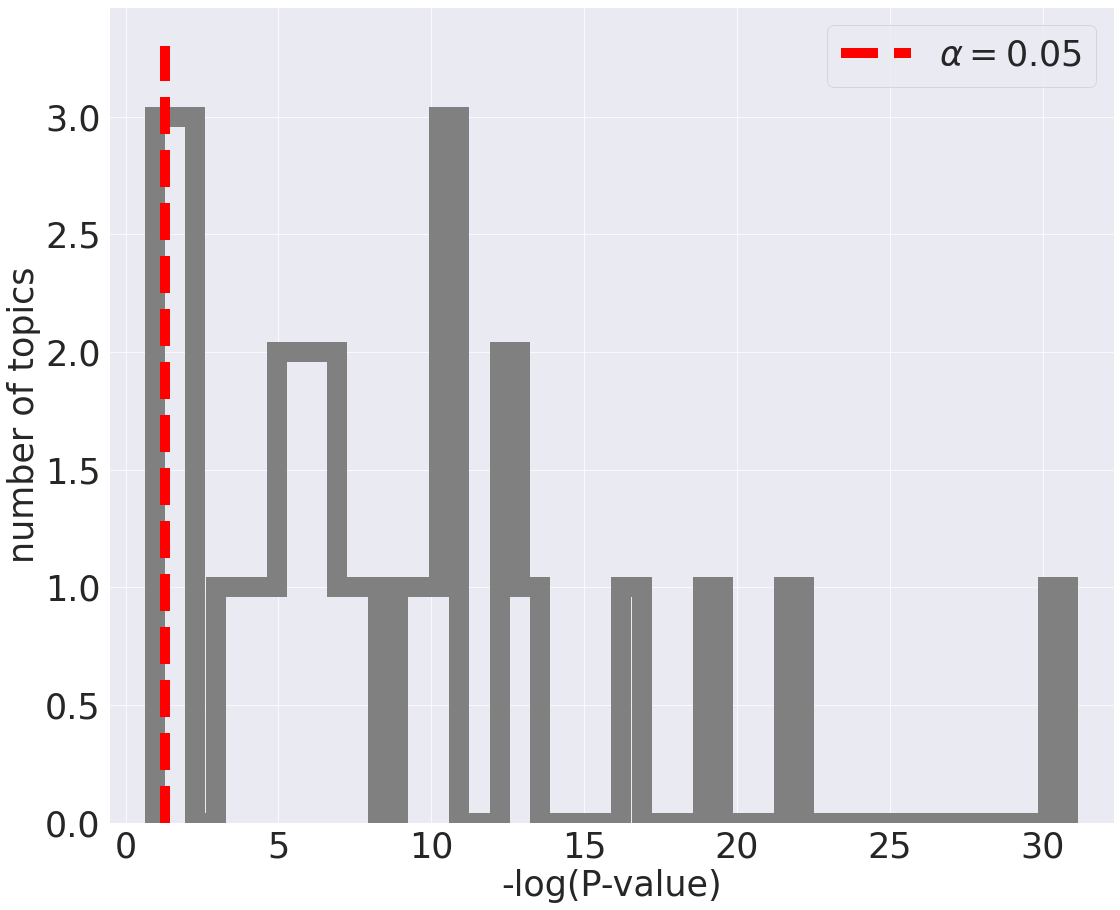

In [13]:
fig = plt.figure(figsize=(18,15))
x = np.arange(1,1+len(topic_pvalues))
c, _, _ = plt.hist(topic_pvalues, histtype='step', lw=20, bins=45, color="gray")
plt.vlines(-np.log10(0.05),0,np.max(c)*1.1, color="red", ls='--', lw=10, label="$\\alpha=0.05$")
plt.xlabel('-log(P-value)', fontsize=35)
plt.ylabel("number of topics", fontsize=35)
#plt.ylim(0,0.055)
#plt.yscale('log')
plt.legend(fontsize=35)
plt.tick_params(which="both",labelsize=35)
fig.savefig("%s/pvalues_acrosstopic_%s_(%d).pdf"%(directory,algorithm,l))

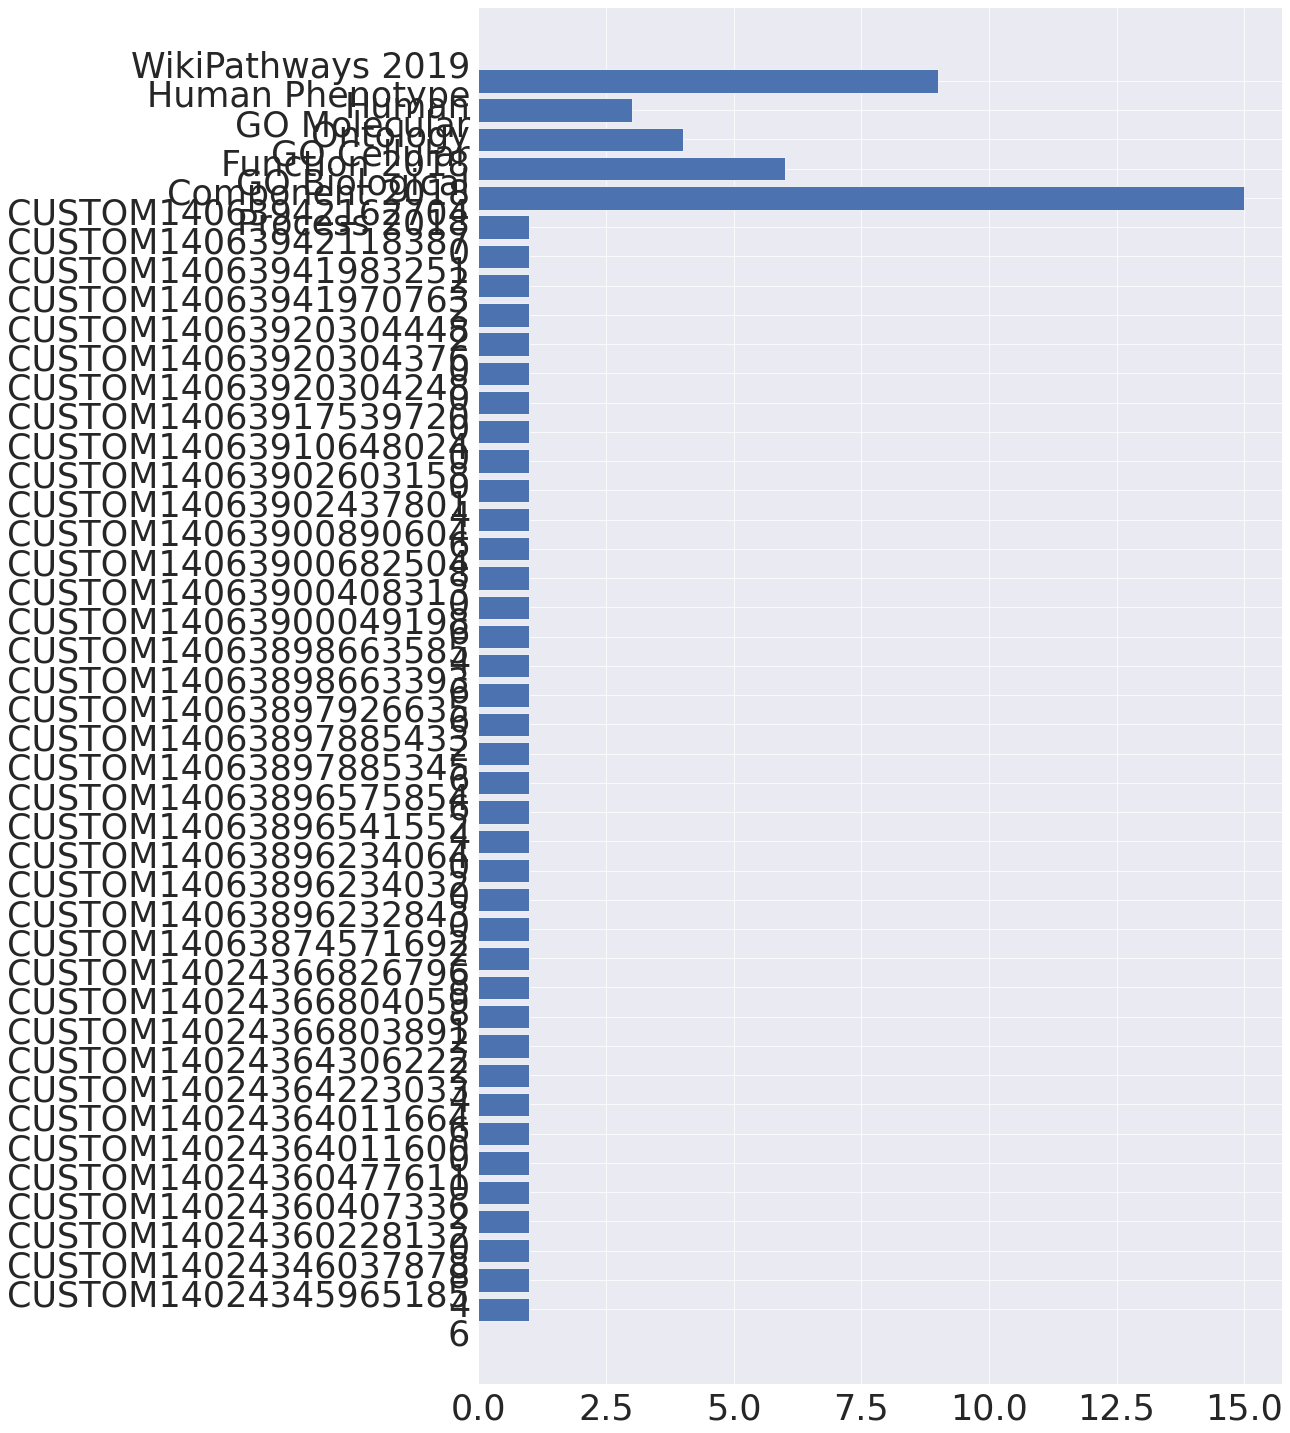

In [27]:
fig = plt.figure(figsize=(18,20))
gos, goscounts = np.unique(topic_gos, return_counts=True)
plt.barh(["\n".join(wrap(str(l).replace('_',' '),20)) for l in gos], goscounts)
plt.yticks(fontsize=15)
plt.tick_params(which="both",labelsize=35)
plt.tight_layout()
plt.show()
fig.savefig("%s/pvalue_categories_%s_(%d).pdf"%(directory,algorithm,l))

# hypergeometric operlaps

In [ ]:
from scipy.stats import hypergeom
from sklearn.metrics import v_measure_score
import seaborn as sns
sns.set_context('paper')

In [ ]:
import importlib, hypergeom
importlib.reload(hypergeom)
from hypergeom import *

In [ ]:
hsbm_list_topics = pd.read_csv("topsbm/topsbm_level_3_topics.csv")
gene_list = hsbm_list_topics.values.ravel().astype(str)
gene_list = list(map(lambda g: g[:15],filter(lambda g: g!="nan", gene_list)))
hsbm_list=pd.Series(index=[g[:15] for g in gene_list], dtype=str)
for topic in hsbm_list_topics.columns:
    hsbm_list[[g[:15] for g in hsbm_list_topics[topic].dropna()]]=topic

In [ ]:
hsbm_list_topics = pd.read_csv("topsbm-log/topsbm-log_level_3_topics.csv")
gene_list = hsbm_list_topics.values.ravel().astype(str)
gene_list = list(map(lambda g: g[:15],filter(lambda g: g!="nan", gene_list)))
hsbm_log_list=pd.Series(index=[g[:15] for g in gene_list], dtype=str)
for topic in hsbm_list_topics.columns:
    hsbm_log_list[[g[:15] for g in hsbm_list_topics[topic].dropna()]]=topic

In [ ]:
wgcna_list_topics = pd.read_csv("wgcna/wgcna_level_0_topics.csv")
gene_list = wgcna_list_topics.values.ravel().astype(str)
gene_list = list(map(lambda g: g[:15],filter(lambda g: g!="nan", gene_list)))
wgcna_list=pd.Series(index=np.unique([g[:15] for g in gene_list]), dtype=str)
for topic in wgcna_list_topics.columns:
    wgcna_list[np.unique([g[:15] for g in wgcna_list_topics[topic].dropna()])]=topic

In [ ]:
tm_list_topics = pd.read_csv("tm/tm_level_0_topics.csv")
gene_list = tm_list_topics.values.ravel().astype(str)
gene_list = list(map(lambda g: g[:15],filter(lambda g: g!="nan", gene_list)))
tm_list=pd.Series(index=np.unique([g[:15] for g in gene_list]), dtype=str)
for topic in tm_list_topics.columns:
    tm_list[np.unique([g[:15] for g in tm_list_topics[topic].dropna()])]=topic

In [ ]:
lda_list_topics = pd.read_csv("lda/lda_level_1_topics.csv")
gene_list = lda_list_topics.values.ravel().astype(str)
gene_list = list(map(lambda g: g[:15],filter(lambda g: g!="nan", gene_list)))
lda_list=pd.Series(index=[g[:15] for g in gene_list], dtype=str)
for topic in lda_list_topics.columns:
    lda_list[lda_list.index.isin([g[:15] for g in lda_list_topics[topic].dropna()])]=topic
lda_list=lda_list.reset_index().drop_duplicates("index").set_index("index")
lda_list=pd.Series(index=lda_list.index, data=lda_list.values.ravel())

In [ ]:
def run(first_name, last_name):
    list_1 = globals()[f"{first_name}_list"]
    list_2 = globals()[f"{last_name}_list"]

    #to uniform
    list_1 = list_1[list_1.index.isin(list_2.index)]
    list_2 = list_2[list_2.index.isin(list_1.index)]
    hyper_params = parameters_for_hypergeometric(list_1, list_2)
    df_cmap = build_map(*hyper_params)
    df_cmap[df_cmap<3]=0
    df_cmap = df_cmap.sort_values(by=[t for t in df_cmap.columns], ascending=False)
    plot_map(df_cmap, first_name=first_name, last_name=last_name)

In [ ]:
run("hsbm","tm")
run("hsbm","lda")
run("hsbm","wgcna")
run("tm","lda")
run("tm","wgcna")
run("lda","wgcna")

In [ ]:
print("hsbm & tm %.3f \\\\ \hline"%v_measure_score(hsbm_list.reindex_like(tm_list), tm_list))
print("hsbm & lda %.3f \\\\ \hline"%v_measure_score(hsbm_list.reindex_like(lda_list).dropna(), lda_list.reindex_like(hsbm_list).dropna()))
print("hsbm & wgcna %.3f \\\\ \hline"%v_measure_score(hsbm_list.reindex_like(wgcna_list), wgcna_list))
print("tm & lda %.3f \\\\ \hline"%v_measure_score(tm_list.reindex_like(lda_list).dropna(), lda_list.reindex_like(tm_list).dropna()))
print("tm & wgcna %.3f \\\\ \hline"%v_measure_score(tm_list.reindex_like(wgcna_list).dropna(), wgcna_list.reindex_like(tm_list).dropna()))
print("lda & wgcna %.3f \\\\ \hline"%v_measure_score(lda_list.reindex_like(wgcna_list).dropna(), wgcna_list.reindex_like(lda_list).dropna()))

In [ ]:
for g in hsbm_list[hsbm_list=="Topic 1"].index:
    print(g)